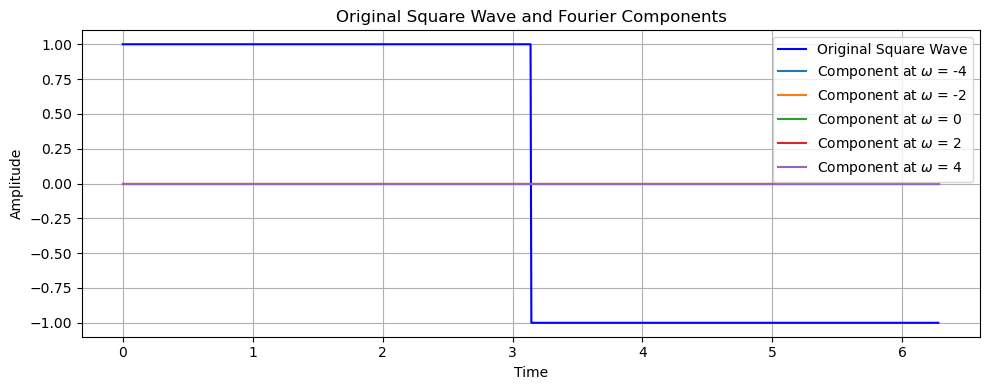

In [3]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(t, T):
    if 0 <= t < T/2:
        return 1
    elif T/2 <= t < T:
        return -1

# Define the Fourier Transform function
def fourier_transform(omega, T):
    integrand = lambda t: square_wave(t, T) * np.exp(-1j * omega * t)
    result, _ = quad(integrand, 0, T)
    return result / (2 * np.pi)

# Define the parameters
T = 2 * np.pi  # Period of the square wave
omega_values = np.linspace(-10, 10, 400)  # Frequency values

# Create a time domain array
t_values = np.linspace(0, T, 1000)

# Calculate the original square wave function
original_signal = [square_wave(t, T) for t in t_values]

# Plot the original square wave function
plt.figure(figsize=(10, 4))
plt.plot(t_values, original_signal, label='Original Square Wave', color='blue')

# Plot a few Fourier components
for omega in [-4, -2, 0, 2, 4]:
    component = [np.real(fourier_transform(omega, T) * np.exp(1j * omega * t)) for t in t_values]
    plt.plot(t_values, component, label=f'Component at $\omega$ = {omega}')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.title('Original Square Wave and Fourier Components')
plt.tight_layout()
plt.show()
